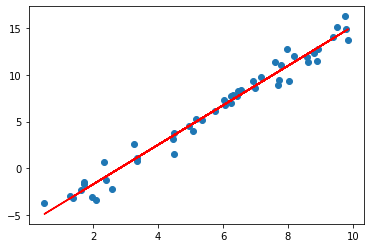

In [4]:
#1.Solve using linear regression using a straight line.Plot the line and indicate the values of slope and intercept.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = 10 * np.random.rand(50)
y = 2 * x - 5 + np.random.randn(50)

def fit(x,y):
    m = (((np.mean(x)*np.mean(y)) - (np.mean(x*y)))/((np.mean(x)**2)-(np.mean(x**2))))
    b = np.mean(y) - m*np.mean(x)
    return m,b

m,b = fit(x,y) 
line = [(m*e)+b for e in x]

plt.scatter(x, y)
plt.plot(x,line,color='r')
plt.show()

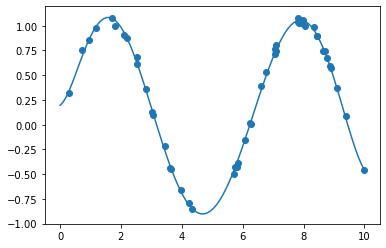

In [19]:
#2.Solve using linear regression using a polynomial basis.PLot the predicted curve.
import matplotlib.pyplot as plt
import numpy as np
x = 10 * np.random.rand(50)
y = np.sin(x) + 0.1 * np.random.rand(50)
deg = 8

phi = np.zeros((x.shape[0],deg))
w = np.zeros((deg,1))

# print(y.shape,w.shape,phi.shape)

for i in range (x.shape[0]):
    for j in range(deg):
        phi[i][j] = x[i]**(j)
        
t = np.dot(phi,w)
# print(y.shape,w.shape,phi.shape,t.shape,np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),phi.T).shape)
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),phi.T),y)
# print(w,w.shape)

plt.scatter(x,y)

o = np.linspace(0,10,100)
phi = np.zeros((deg,o.shape[0]))
for i in range (deg):
    for j in range(o.shape[0]):
        phi[i][j] = o[j]**(i)

plt.plot(o,np.matmul(w,phi).T)
plt.show()

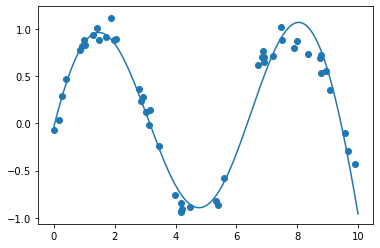

In [6]:
#3.Solve using linear regression using a guassian basis.PLot the predicted curve
x = np.array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])
y = np.array([-0.92530881,  0.71111718, -0.06598087,  0.11672496,  0.88294471,
        0.8210899 ,  1.12370616, -0.23467501, -0.75446517, -0.86898322,
       -0.94231439,  0.70804351,  0.89495535,  0.53638242,  0.28955648,
        0.61914583, -0.84603144, -0.5796531 ,  1.01611705,  0.88180869,
        0.87399567, -0.28992469, -0.01353862,  0.65589053,  0.69771523,
        0.55374595,  0.78013085,  0.46920917,  0.91644209,  0.72516826,
        0.8837173 , -0.90676173, -0.10465615, -0.82186313,  0.70681199,
        0.13841844,  0.76810625,  0.74161023,  0.03745364,  0.88805266,
       -0.43137564,  1.01910093,  0.36236496,  0.7970268 ,  0.82783992,
       -0.89007576,  0.35538665,  0.28020998,  0.23855606,  0.94355877])

deg = 5

mu = np.linspace(0,10,deg)
phi = np.zeros((x.shape[0],deg))
w = np.zeros((deg,1))

for i in range (x.shape[0]):
    for j in range(deg):
        phi[i][j] = np.exp(-((x[i] - mu[j])**2)/25)
        
t = np.dot(phi,w)
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),phi.T),y)
plt.scatter(x,y)

o = np.linspace(0,10,1000)
phi = np.zeros((deg,o.shape[0]))
for i in range (deg):
    for j in range(o.shape[0]):        
        phi[i][j] = np.exp(-((o[j] - mu[i])**2)/25)
        
plt.plot(o,np.matmul(w,phi).T)
plt.show()

(50,) (12, 1) (50, 12) (50, 1) (12, 12) (12,) (12, 12)


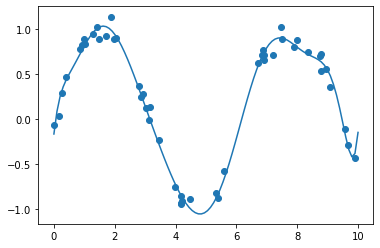

In [35]:
#4.Fit the data given in above problem using L1 and l2 regularization.PLot the predicted curve

#  A  ->  L1 Regularization
x = np.array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])
y = np.array([-0.92530881,  0.71111718, -0.06598087,  0.11672496,  0.88294471,
        0.8210899 ,  1.12370616, -0.23467501, -0.75446517, -0.86898322,
       -0.94231439,  0.70804351,  0.89495535,  0.53638242,  0.28955648,
        0.61914583, -0.84603144, -0.5796531 ,  1.01611705,  0.88180869,
        0.87399567, -0.28992469, -0.01353862,  0.65589053,  0.69771523,
        0.55374595,  0.78013085,  0.46920917,  0.91644209,  0.72516826,
        0.8837173 , -0.90676173, -0.10465615, -0.82186313,  0.70681199,
        0.13841844,  0.76810625,  0.74161023,  0.03745364,  0.88805266,
       -0.43137564,  1.01910093,  0.36236496,  0.7970268 ,  0.82783992,
       -0.89007576,  0.35538665,  0.28020998,  0.23855606,  0.94355877])

deg = 12

phi = np.zeros((x.shape[0],deg))
w = np.zeros((deg,1))

# print(y.shape,w.shape,phi.shape)

for i in range (x.shape[0]):
    for j in range(deg):
        phi[i][j] = x[i]**(j)
        
t = np.dot(phi,w)
lamda = 5*np.identity(deg)
# print(lamda)
# print(np.matmul(phi.T,y).shape) 
print(y.shape,w.shape,phi.shape,t.shape,np.linalg.inv(np.matmul(phi.T,phi)).shape,np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),(np.matmul(phi.T,y))).shape,np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),lamda).shape)
w = np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),(np.matmul(phi.T,y))) - np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),lamda)
# print(w.shape)

plt.scatter(x,y)

o = np.linspace(0,10,100)
phi = np.zeros((deg,o.shape[0]))
for i in range (deg):
    for j in range(o.shape[0]):
        phi[i][j] = o[j]**(i)

plt.plot(o,np.matmul(w[8],phi).T)
plt.show()

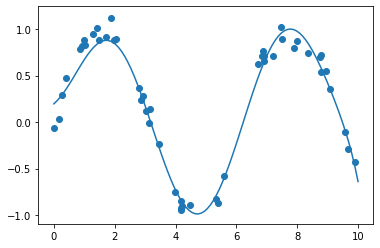

In [17]:
# B  ->  L2 Regularization

x = np.array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00])
y = np.array([-0.92530881,  0.71111718, -0.06598087,  0.11672496,  0.88294471,
        0.8210899 ,  1.12370616, -0.23467501, -0.75446517, -0.86898322,
       -0.94231439,  0.70804351,  0.89495535,  0.53638242,  0.28955648,
        0.61914583, -0.84603144, -0.5796531 ,  1.01611705,  0.88180869,
        0.87399567, -0.28992469, -0.01353862,  0.65589053,  0.69771523,
        0.55374595,  0.78013085,  0.46920917,  0.91644209,  0.72516826,
        0.8837173 , -0.90676173, -0.10465615, -0.82186313,  0.70681199,
        0.13841844,  0.76810625,  0.74161023,  0.03745364,  0.88805266,
       -0.43137564,  1.01910093,  0.36236496,  0.7970268 ,  0.82783992,
       -0.89007576,  0.35538665,  0.28020998,  0.23855606,  0.94355877])

deg = 9

phi = np.zeros((x.shape[0],deg))
w = np.zeros((deg,1))

# print(y.shape,w.shape,phi.shape)

for i in range (x.shape[0]):
    for j in range(deg):
        phi[i][j] = x[i]**(j)
        
t = np.dot(phi,w)
lamda = 5*np.identity(deg)
# print(lamda)

# print(y.shape,w.shape,phi.shape,t.shape,np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),phi.T).shape)
w = np.matmul(np.matmul(np.linalg.inv(lamda + np.matmul(phi.T,phi)),phi.T),y)
# print(w,w.shape)

plt.scatter(x,y)

o = np.linspace(0,10,100)
phi = np.zeros((deg,o.shape[0]))
for i in range (deg):
    for j in range(o.shape[0]):
        phi[i][j] = o[j]**(i)
# print(o.shape,np.matmul(w,phi).T.shape)
plt.plot(o,np.matmul(w,phi).T)
plt.show()

A)



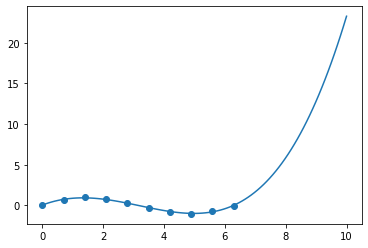

B)

Beta inverse  =  226.05643023092836


C)

Sn inverse  =  [[5.00442367e+00 4.42367421e-03 4.42367421e-03 ... 4.42367421e-03
  4.42367421e-03 4.42367421e-03]
 [4.42367421e-03 5.00446927e+00 4.51582447e-03 ... 2.16671818e-02
  2.21138580e-02 2.25697432e-02]
 [4.42367421e-03 4.51582447e-03 5.00461190e+00 ... 1.32724349e-01
  1.37089674e-01 1.41569187e-01]
 ...
 [4.42367421e-03 2.16671818e-02 1.32724349e-01 ... 3.79689668e+05
  3.95543071e+05 4.11893139e+05]
 [4.42367421e-03 2.21138580e-02 1.37089674e-01 ... 3.95543071e+05
  4.12069292e+05 4.29097743e+05]
 [4.42367421e-03 2.25697432e-02 1.41569187e-01 ... 4.11893139e+05
  4.29097743e+05 4.46840779e+05]]


Mn  =  [ 0.03607124  0.0783618   0.13970996  0.01356716 -0.00194163]


In [16]:
#5.a) L2 regularized linear regression using a polynomial basis function.
#b)Maximum likelihood weight estimation assuming that the labels follow a Gaussian distribution when conditioned on the inputs and weights.
#c)Maximumposterior weight estimation assuming that the labels follow a Gaussian distribution when conditioned on the inputs and weights, and the weights themselves follow a Gaussian distribution with parameter α(alpha). 
#Experiment with various values for the parameters of the model,number of training samples, the Lagrangian multiplier λ, hyperparameter α.
#Use the following code snippet to generate training samples
import numpy as np 
from scipy.stats import norm
# Number of training samples 
N = 10
# Generate equispaced floats in the interval [0, 2π] 
x = np.linspace(0, 2*np.pi, N) 
# Generate noise 
mean = 0 
std = 0.05
# Generate some numbers from the sine function 
y = np.sin(x) 
# Add noise 
y += np.random.normal(mean, std, N)


#  A  -- >

deg = 5

phi = np.zeros((x.shape[0],deg))
w = np.zeros((deg,1))


for i in range (x.shape[0]):
    for j in range(deg):
        phi[i][j] = x[i]**(j)

w = np.matmul(np.matmul(np.linalg.inv(np.matmul(phi.T,phi)),phi.T),y)

print("A)\n")
plt.scatter(x,y)

o = np.linspace(0,10,100)
phi = np.zeros((deg,o.shape[0]))
for i in range (deg):
    for j in range(o.shape[0]):
        phi[i][j] = o[j]**(i)
     
t = np.dot(w,phi)
plt.plot(o,np.matmul(w,phi).T)
plt.show()



#B   -->  MLE : 

# print(y.shape,t.shape)
Beta_inv = np.sum((o - t)**2)/N
# print(w)
print("B)\n")
print("Beta inverse  = ",Beta_inv)
print("\n")
# print(np.matmul(w.T,phi))


#C  -->  MAP :

lamda = 5*np.identity(o.shape[0])
l = np.matmul(phi.T,phi)
sn_inv = lamda + (1/Beta_inv) * l
print("C)\n")
print("Sn inverse  = ",sn_inv)
print("\n")

sn = np.linalg.inv(sn_inv)
# print(sn.shape)
# print(phi.T.shape)
# print(o.shape)
mn = (1/Beta_inv) * np.matmul(o,np.matmul(sn,phi.T))

print("Mn  = ",mn)

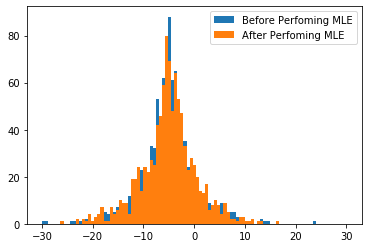

In [292]:
#6.write a program to perform MLE for the following. Generate samples from your estimated parameters and compare with your data X.
#(e) Laplacian.

def sort(arr):
    for i in range(len(arr)):
        swap = i + np.argmin(arr[i:])
        (arr[i], arr[swap]) = (arr[swap], arr[i])
    return arr

def lapl(nu,l,N):
	#Function will print u and lambda
	lp1 = np.random.laplace(nu,l,N)
	bins = np.linspace(-30,30,100)
	plt.hist(lp1,bins,label='Before Perfoming MLE')
	arr = sort(lp1)
	index = (N-1)//2
	if(N%2==0):
		nu = arr[index] 
# 		print(nu);
		print('\n')
# 		print(sum(abs(lp1-nu))/N)
	else:
		nu = (arr[index] + arr[index+1])/2.0 
# 		print(nu)
		l = (sum(abs(lp1-nu))/N)
# 		print(l)
		print('\n')

	lp2 = np.random.laplace(nu,l,N)	
	plt.hist(lp2,bins,label='After Perfoming MLE')
	plt.legend(loc='best')
	#plt.savefig('Laplacian.pdf')
	print('\n')
    
    
lapl(-5,4,1000)


0.906




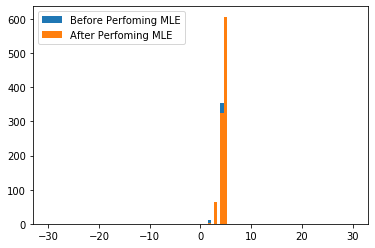

In [294]:
#(a) Binomial,
def bino(n,p):
	#Function will print p
	
	b1 = np.random.binomial(n,p,1000)
	bins = np.linspace(-30,30,100)
	plt.hist(b1, bins,label='Before Perfoming MLE')
	if(n==0):
		p = sum(np.random.binomial(n,p,1000)==0)/(1000)
		print(p)
	else:
		p = sum(np.random.binomial(n,p,1000))/(1000*n)
		print(p)
	b2 = np.random.binomial(n,p,1000)
	plt.hist(b2, bins,label='After Perfoming MLE')
	plt.legend(loc='best')
	#plt.savefig('binomial.pdf')
	print('\n')
    

bino(5,0.9)
plt.show()

5.0072




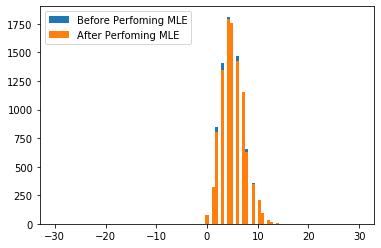

In [285]:
#(b) Poisson,

def poisson(lamb):
	#Function will print lamda
	p1 = np.random.poisson(lamb,10000)
	bins = np.linspace(-30,30,100)
	plt.hist(p1, bins,label='Before Perfoming MLE')
	lamb = sum(p1)/(10000)
	print(lamb)
	p2 = np.random.poisson(lamb,10000)
	plt.hist(p2, bins,label='After Perfoming MLE')
	plt.legend(loc='best')
	#plt.savefig('poisson.pdf')
	print('\n')
    
poisson(5)
plt.show()

7.081004273303099




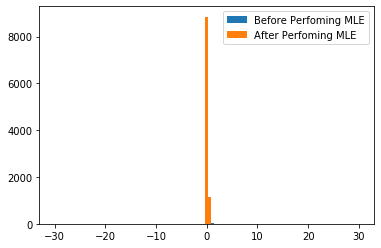

In [289]:
#(c) Exponential,

def expon(lm):
	#Function will print lambda
	e1 = np.random.exponential((1/lm),10000)
	bins = np.linspace(-30,30,100)
	plt.hist(e1,bins,label='Before Perfoming MLE')

	lm = (10000/sum(e1))
	print(lm)

	e2 = np.random.exponential((1/lm),10000)
	plt.hist(e2,bins,label='After Perfoming MLE')
	plt.legend(loc='best')
	#plt.savefig('Exponential.pdf')
	print('\n')
    
expon(7)

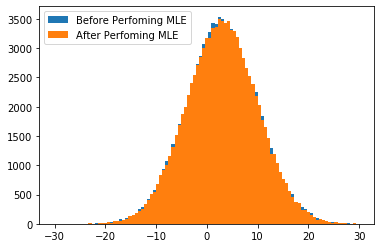

In [291]:
#(d) Gaussian,

def gauss(u,sig):
	#Function will print u and sigma
	g1 = np.random.normal(u,sig,100000)
	bins = np.linspace(-30,30,100)
	plt.hist(g1,bins,label='Before Perfoming MLE')

	u = sum(g1)/100000
# 	print(u)
	print('\n')
	sig = np.sqrt(sum(np.square(g1-u))/100000)
# 	print(sig)

	g2 = np.random.normal(u,sig,100000)
	plt.hist(g2,bins,label='After Perfoming MLE')
	plt.legend(loc='best')
	#plt.savefig('Gaussian.pdf')
	print('\n')
    
gauss(3,7)
plt.show()